This notebook explain how to use the simulated data set 1 : 
* one should add observational noise to the true LQSO proper motion
* one can set the LQSO proper motion to zero to simulate the null hypothesis
* one should cut the LQSO at magnitude 21 to take in account GAIA magnitude selection

The data set 1 has still limitations but it captures some of the features observed in DR2 LQSO. One can also imagine to merge the images that are closer than 0.5 arcseconds since Gaia will not resolve them. The merging law should be defined. 

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import astropy.units as u

In [3]:
mp.rcParams['figure.figsize'] = (12, 8)

In [4]:
ls /Users/abombrun/Documents/GitHub/StatClub

LICENSE        castleDR2.csv  gaiapix/       notebooks/
README.md      data/          lens/


In [5]:
def setMu(d):
    d['mu'] = np.sqrt(np.power(d.pmra,2)+np.power(d.pmdec,2))
    d['mu_error'] = np.sqrt(np.power(d.pmra_error,2)+np.power(d.pmdec_error,2))
    d['mu_over_error'] = d.mu/d.mu_error

In [6]:
d = pd.read_csv("../data/simDataSet1.csv.gzip",compression='gzip')

the simulated data set contains the true proper motion of the LQSO, i.e. one should add the observation errors

In [7]:
d['pmra']=d.pmra + (d.type=="LQSO") * np.random.normal(0,d.pmra_error)
d['pmdec']=d.pmdec + (d.type=="LQSO") *np.random.normal(0,d.pmdec_error)
setMu(d)

to simulate zero proper motion for the lensed QSO one should simply set it to zero

In [8]:
d0 = d.copy()
d0['pmra']= (d0.type!="LQSO") * d.pmra + (d0.type=="LQSO") * np.random.normal(0,d0.pmra_error)
d0['pmdec']= (d0.type!="LQSO") * d.pmdec  + (d0.type=="LQSO") *np.random.normal(0,d0.pmdec_error)
setMu(d0)

In [9]:
d.groupby(d.type).mu.count()

type
LQSO       256
QSO     393907
STAR     23325
Name: mu, dtype: int64

In [10]:
d.groupby(d.type)['astrometric_pseudo_colour','phot_g_mean_mag','mu','mu_error','mu_over_error'].median()

,astrometric_pseudo_colour,phot_g_mean_mag,mu,mu_error,mu_over_error
type,,,,,
LQSO,1.559958,18.940928,0.966864,0.902780,0.969654
QSO,1.700201,19.238500,0.869711,1.079246,0.832599
STAR,1.600442,18.435000,10.782393,0.666419,18.101078


Comparing the LQSO generated with a normal pm distribution with 0.1 mas sigma, and the LQSO with 0 proper motion.
Note there was no cut in magnitude in the similuated LQSO, to take in account Gaia magnitude limitation one should cut at 21. 

Text(0,0.5,'$\\mu$ [mas/yr]')

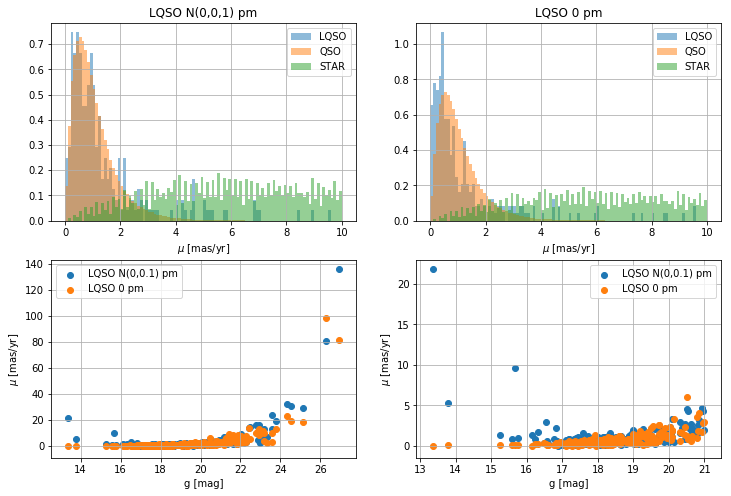

In [11]:
plt.subplot(221)
for k,g in d.groupby(d.type):
    g.mu.hist(bins=100,alpha=0.5,range=(0,10),normed=True,label=k)
plt.legend()
plt.xlabel("$\mu$ [mas/yr]")
plt.title("LQSO N(0,0,1) pm")

plt.subplot(222)
for k,g in d0.groupby(d0.type):
    g.mu.hist(bins=100,alpha=0.5,range=(0,10),normed=True,label=k)
plt.legend()
plt.xlabel("$\mu$ [mas/yr]")
plt.title("LQSO 0 pm")

plt.subplot(223)
s =  d[d.type=="LQSO"]
s0 =  d0[d0.type=="LQSO"]
plt.scatter(s.phot_g_mean_mag,s.mu,label="LQSO N(0,0.1) pm") 
plt.scatter(s0.phot_g_mean_mag,s0.mu,label="LQSO 0 pm")
plt.grid()
plt.legend()
plt.xlabel("g [mag]")
plt.ylabel("$\mu$ [mas/yr]")

plt.subplot(224)
s =  d[(d.type=="LQSO") & (d.phot_g_mean_mag<21)]
s0 =  d0[(d0.type=="LQSO") & (d0.phot_g_mean_mag<21)]
plt.scatter(s.phot_g_mean_mag,s.mu,label="LQSO N(0,0.1) pm") 
plt.scatter(s0.phot_g_mean_mag,s0.mu,label="LQSO 0 pm")
plt.grid()
plt.legend()
plt.xlabel("g [mag]")
plt.ylabel("$\mu$ [mas/yr]")

Text(0.5,0,'g [mag]')

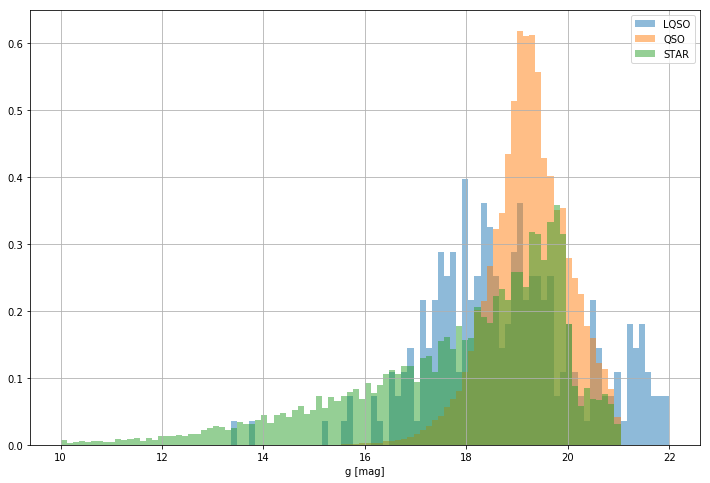

In [12]:
for k,g in d.groupby(d.type):
    g.phot_g_mean_mag.hist(bins=100,alpha=0.5,range=(10,22),normed=True,label=k)
plt.legend()
plt.xlabel("g [mag]")

# LQSO

In [13]:
lensqsoid = np.unique(d[d.type=='LQSO'].qsoid.values)

In [14]:
s = d[d.qsoid==lensqsoid[0]]

In [15]:
s

,Unnamed: 0,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,source_id,astrometric_pseudo_colour,qsoid,type,mu,mu_error,mu_over_error
417350,25125411321226750,38.379255,140.508406,10.671748,140.508406,-0.436963,1.389257,3.769559,2.630841,-1.435254,2.630841,21.301190,25125411321226750,1.470622,25125401997227773,LQSO,4.033550,3.720570,1.084121
417351,25125401997227773,38.379612,4.866852,10.671514,4.866852,0.100889,0.550050,1.346205,1.058926,-1.525429,1.058926,19.784443,25125401997227773,1.469537,25125401997227773,LQSO,2.034503,1.497548,1.358556


In [16]:
s.columns

Index(['Unnamed: 0', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'phot_g_mean_mag', 'source_id', 'astrometric_pseudo_colour', 'qsoid',
       'type', 'mu', 'mu_error', 'mu_over_error'],
      dtype='object')

In [17]:
def plotGaiaLens(d,qsoid,r=(-5,5),pm=True,pmscale=1):
    s = d[d.qsoid==qsoid]
    x = (s.ra - s.ra.median())*u.deg.to(u.arcsecond)*np.cos(s.dec)
    y = (s.dec - s.dec.median())*u.deg.to(u.arcsecond)
    plt.errorbar(x,y,xerr=s.ra_error, yerr=s.dec_error,fmt='.')
    plt.scatter(x,y,s=100*np.exp(20-s.phot_g_mean_mag),c=s.astrometric_pseudo_colour)
    plt.colorbar(label="nuEff")
    if pm : 
        vx = s.pmra*pmscale
        vy = s.pmdec*pmscale
        plt.quiver(x,y, vx, vy)#note the pm are in mas, angles='xy', scale_units='xy', scale=1)
        plt.errorbar(x+vx,y+vy,xerr=s.pmra_error, yerr=s.pmdec_error,fmt='o')
    plt.grid()
    plt.xlabel("x [\"] ")
    plt.ylabel("y [\"] ")
    plt.xlim(r)
    plt.ylim(r)

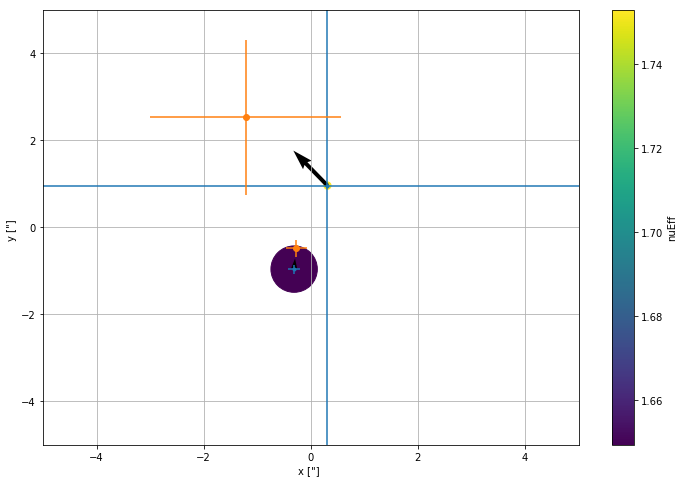

In [18]:
plotGaiaLens(d,lensqsoid[1])

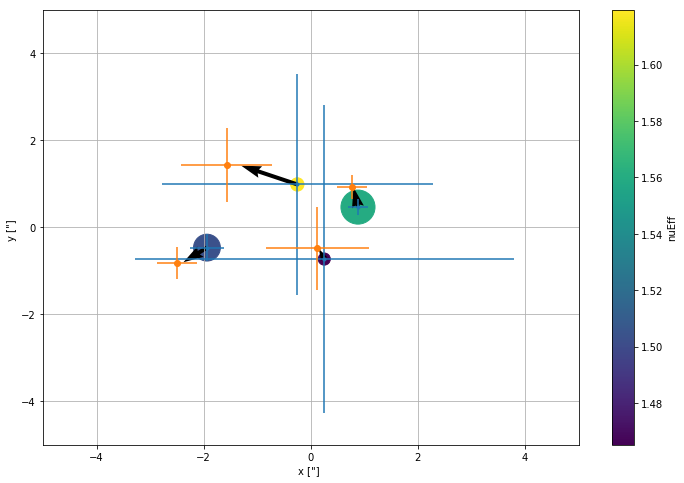

In [19]:
plotGaiaLens(d,lensqsoid[2])

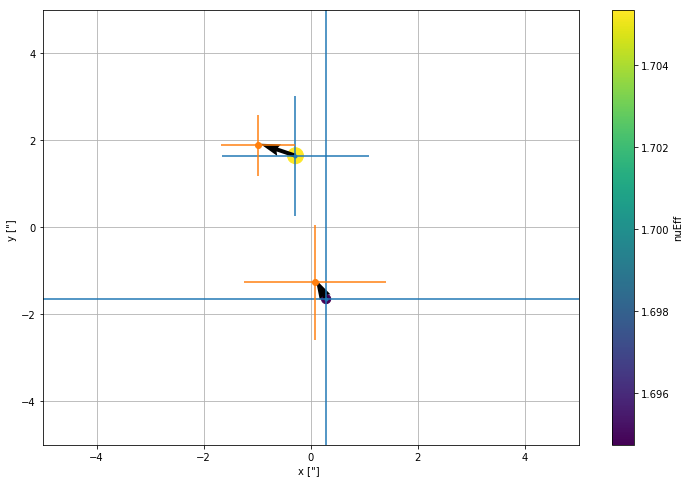

In [20]:
plotGaiaLens(d,lensqsoid[3])

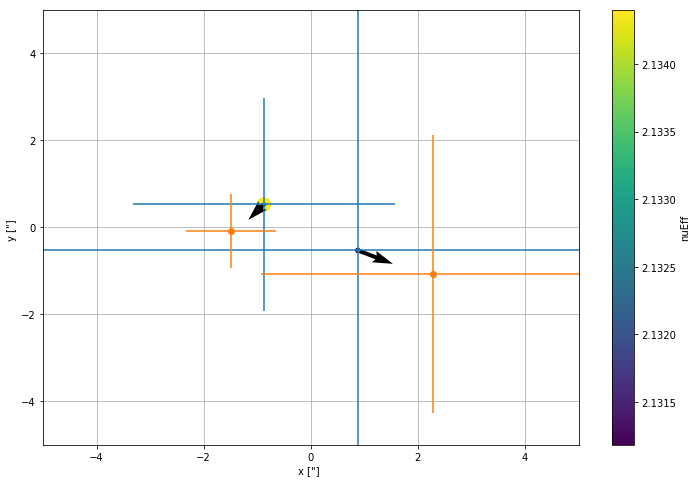

In [21]:
plotGaiaLens(d,lensqsoid[4])

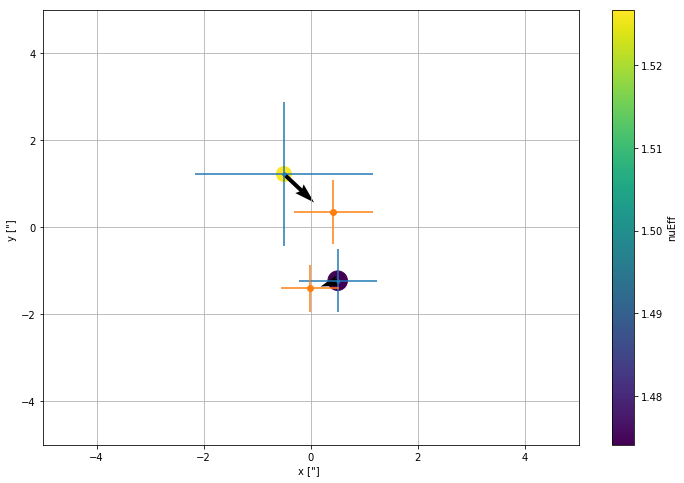

In [22]:
plotGaiaLens(d,lensqsoid[10])

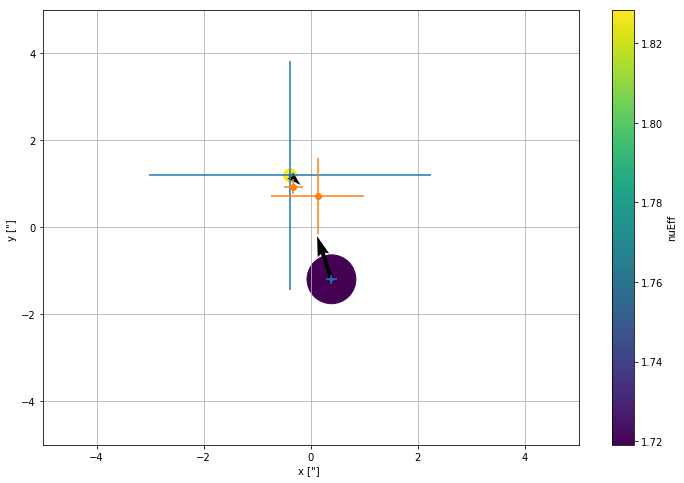

In [23]:
plotGaiaLens(d,lensqsoid[11])

are we seeing all LQSOs?

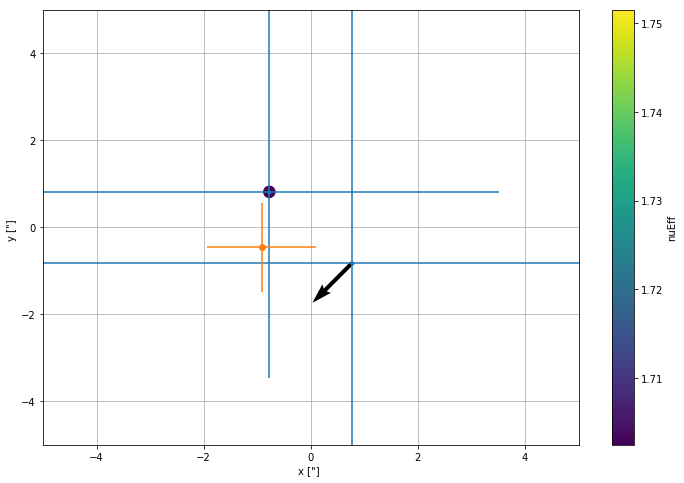

In [24]:
plotGaiaLens(d,lensqsoid[12])

lens with the largest apparent proper motion

In [25]:
d[d.index==d[d.type=='LQSO'].mu.idxmax()].qsoid

417484    4584606591488214664
Name: qsoid, dtype: int64

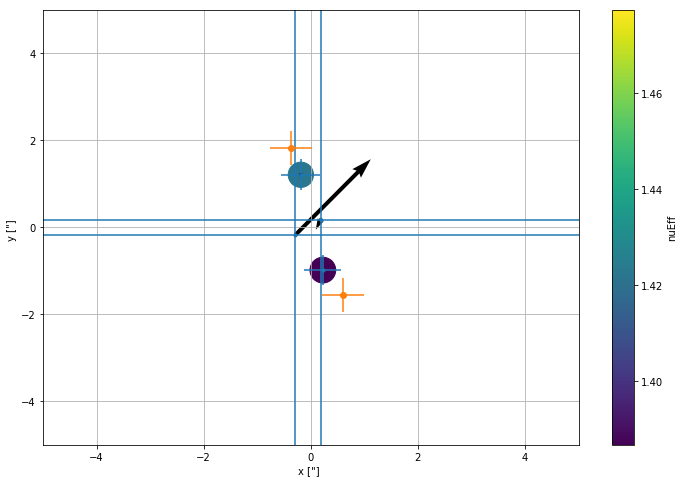

In [26]:
plotGaiaLens(d,4584606591488214664)